# **Load Dataset**
Film: https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data


In [1]:
import pandas as pd
import os
import zipfile

In [2]:
# mengimport module/mengunggah file dari komputer
from google.colab import files

upload = files.upload()

for fn in upload.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [3]:
# membuat direktori .kaggle
!mkdir ~/.kaggle

# memindahkan file json ke direktori .kaggle
!mv kaggle.json ~/.kaggle/

# # Ubah permission file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download dataset
!kaggle datasets download -d parasharmanas/movie-recommendation-system

Dataset URL: https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system
License(s): ODbL-1.0
 73% 120M/165M [00:00<00:00, 1.26GB/s]
100% 165M/165M [00:00<00:00, 1.09GB/s]


In [5]:
# ekstrak file ZIP
with zipfile.ZipFile("movie-recommendation-system.zip", 'r') as zip_ref:
    zip_ref.extractall("movie_data")

# cek isi folder
os.listdir("movie_data")

['movies.csv', 'ratings.csv']

# **Data Understanding**

Tujuan dari tahapan ini adalah untuk mendapatkan gambaran awal tentang struktur, isi, dan karakteristik data yang akan digunakan.

In [6]:
# membaca data movies
df_movies = pd.read_csv("movie_data/movies.csv")
print(f'dimensi dataset: {df_movies.shape}')
df_movies.head()


dimensi dataset: (62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dataset movies.csv memiliki dimensi 62423 (baris) dan 3 (kolom/fitur). Berikut ini fitur pada data:
- movieId: variabel ini berisi ID unik untuk setiap film. Ini adalah pengenal numerik yang digunakan untuk membedakan satu film dari film lainnya dalam dataset.
- title: variabel ini berisi judul film. Variabel ini menyimpan judul dalam format string
- genres: variabel ini berisi informasi genre dari setiap film. Variabel ini menyimpan genre film dalam format string yang dipisahkan oleh '|'.

In [7]:
# membaca data ratings
df_ratings = pd.read_csv("movie_data/ratings.csv")
print(f'dimensi dataset: {df_ratings.shape}')
df_ratings.head()

dimensi dataset: (25000095, 4)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


Dataset ratings.csv memiliki dimensi 25000095 (baris) dan 4 (kolom). Berikut ini fitur pada data:

- userId: variabel ini berisi ID unik untuk setiap pengguna (user) dalam dataset. Ini adalah pengenal numerik yang digunakan untuk membedakan satu pengguna dari pengguna lainnya.
-  movieId: variabel ini berisi ID unik untuk setiap film. Ini adalah pengenal numerik yang digunakan untuk membedakan satu film dari film lainnya dalam dataset. Variabel ini juga muncul di dataset movies.csv dan berfungsi sebagai kunci untuk menggabungkan informasi film dan rating.
- rating: variabel ini berisi nilai rating yang diberikan oleh seorang pengguna (userId) untuk film tertentu (movieId). Nilai rating menunjukkan preferensi pengguna terhadap film tersebut.
- timestamp: variabel ini berisi informasi waktu (dalam format timestamp) kapan rating tersebut diberikan oleh pengguna.

# **Univariate Exploratory Data Analysis**

***Data Movies***

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
print('Jumlah data null: ')
print(df_movies.isnull().sum())
print('\nJumlah data duplikat: ', df_movies.duplicated().sum().sum())

Jumlah data null: 
movieId    0
title      0
genres     0
dtype: int64

Jumlah data duplikat:  0


In [11]:
# membersihkan judul
import re

def clean_title(title):
  return re.sub("[^a-zA-Z0-9 ]", "", title)

df_movies['title'] = df_movies['title'].apply(clean_title)

# memisahkan string genre menjadi daftar genre individual
df_movies['genres'] = df_movies['genres'].str.split('|')

movie_data = df_movies[['movieId', 'title', 'genres']]

In [12]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji 1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men 1995,"[Comedy, Romance]"
3,4,Waiting to Exhale 1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II 1995,[Comedy]


In [13]:
# melihat jumlah judul film
print('Jumlah judul film: ', len(movie_data.title.unique()))
print('Jumlah genre film: ', movie_data.genres.explode().nunique())
print('Daftar genre film: ', movie_data.genres.explode().unique())


Jumlah judul film:  62298
Jumlah genre film:  20
Daftar genre film:  ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


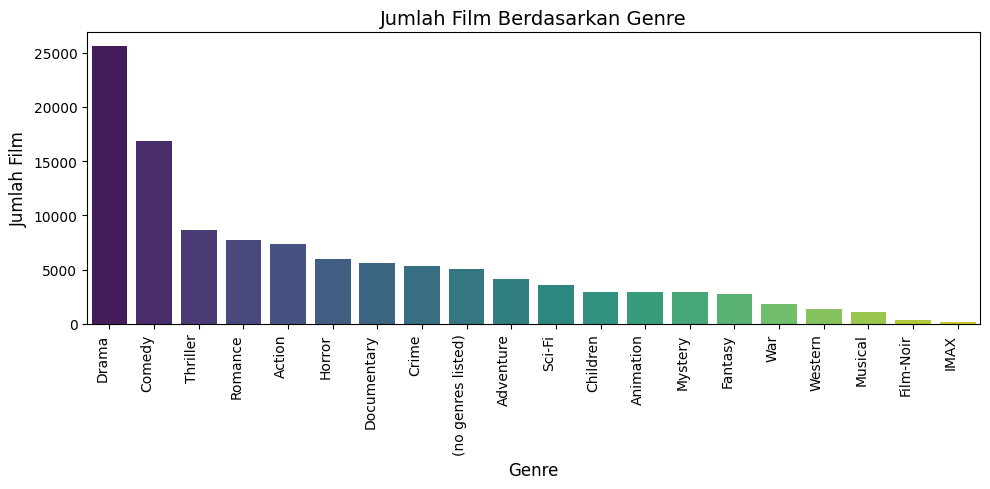

In [14]:
# menghitung jumlah film per genre
import matplotlib.pyplot as plt
import seaborn as sns

# hitung jumlah genre
count_genre = movie_data.genres.explode().value_counts().reset_index()
count_genre.columns = ['Genre', 'Jumlah Film']

# plot dengan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=count_genre, x='Genre', y='Jumlah Film', palette='viridis', hue='Genre', legend=False)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.title('Jumlah Film Berdasarkan Genre', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Penjelasan Tahapan EDA pada data movie:
- Melihat informasi data. Terdapat 62423 baris dan 3 kolom.
- Mengecek missing value dan data duplikat. Tidak ada nilai nul dan data duplikat.
- Membersihkan judul film, dengan mengganti semua karakter dalam string yang bukan huruf(a-z, A-Z, 0-9, dan spasi) dengan string kosong(""), sehingga judul film hanya mengandung huruf, angka, dan spasi.
- Melihat jumlah film, jumlah genre, dan daftar genre film. Terdapat 20 daftar genre, dan ada genre dengan kategori '(no genres listed)'.
- Membuat visualisasi (diagram batang) untuk menampilkan distribusi jumlah film berdasarkan genre. Berdasarkan visualisasi film dengan genre drama paling banyak di data ini.

***Data Ratings***

In [15]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [19]:
df_ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [20]:
df_ratings.duplicated().sum()

np.int64(0)

Distribusi Rating: 
rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64


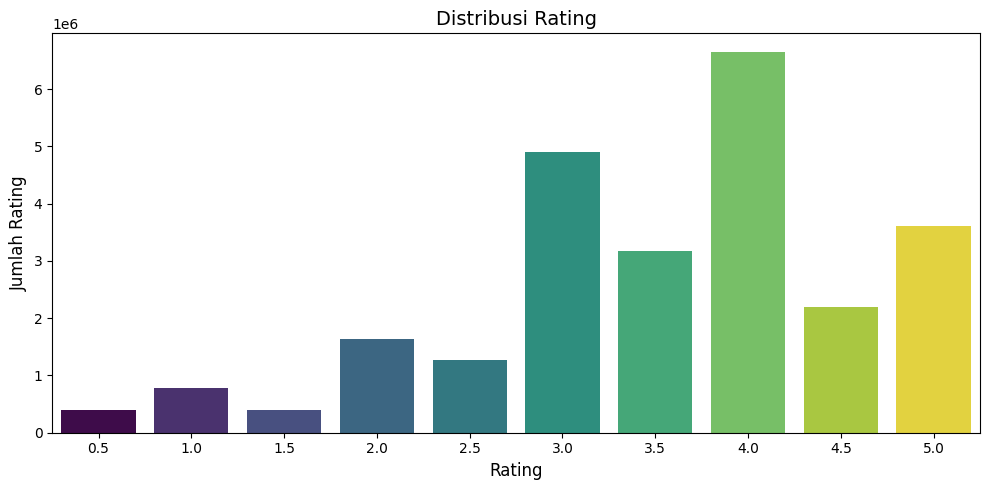

In [21]:
# melihat distribusi rating
print('Distribusi Rating: ')
print(df_ratings.rating.value_counts())

plt.figure(figsize=(10, 5))
sns.countplot(data=df_ratings, x='rating', palette='viridis', hue='rating', legend=False)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Rating', fontsize=12)
plt.title('Distribusi Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
# melihat rating rata-rata per film
rating_mean = df_ratings.groupby('movieId')['rating'].mean().reset_index()
rating_mean.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


Penjelasan Tahapan EDA pada data ratings:
- Menampilkan informasi data. Ada 25000095 baris dan 4 kolom.
- Setelah di cek tidak ada missing value dan data duplikat.
- Melihat distribusi rating. Rating 4.0 paling banyak dan disusul dengan 3.0.


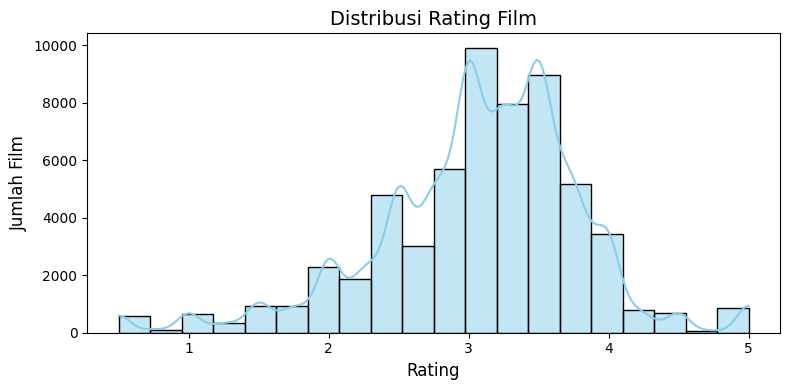

In [27]:
# plot distribusi
plt.figure(figsize=(8, 4))
sns.histplot(data=rating_mean, x='rating', bins=20, kde=True, color='skyblue')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.title('Distribusi Rating Film', fontsize=14)
plt.tight_layout()
plt.show()

Visualisasi ini dibuat setelah menghitung rata-rata rating untuk setiap film yang ada di dataset. Plot histogram dan KDE ini menampilkan distribusi rating rata-rata per film. Sumbu X menunjukkan nilai rating rata-rata, dan Sumbu Y menunjukkan jumlah film. Visualisasi ini menunjukkan sebaran rating rata-rata film, di mana puncak grafik (nilai 3) mengindikasikan rentang rating rata-rata yang paling umum di dataset.

In [25]:
# melihat rating rata-rata per pengguna
rating_user = df_ratings.groupby('userId')['rating'].mean().reset_index()
rating_user.head()


,userId,rating
0,1,3.814286
1,2,3.630435
2,3,3.697409
3,4,3.378099
4,5,3.752475


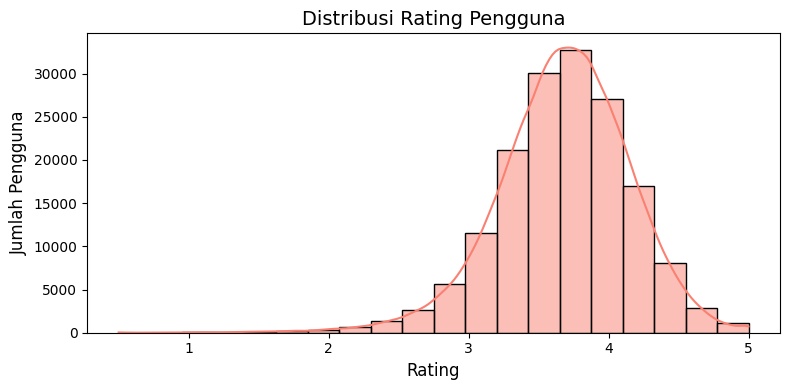

In [28]:
# plot distribusi
plt.figure(figsize=(8, 4))
sns.histplot(data=rating_user, x='rating', bins=20, kde=True, color='salmon')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.title('Distribusi Rating Pengguna', fontsize=14)
plt.tight_layout()
plt.show()

Visualisasi ini dibuat setelah menghitung rata-rata rating yang diberikan oleh setiap pengguna dalam dataset. Dari plot ini kita dapat mengidentifikasi pola umum dalam cara pengguna memberikan rating. Dimaan puncak grafik mengindikasikan rentang rating rata-rata yang paling sering diberikan oleh pengguna, berdasarkan grefik adalah rentang 3-4.

# **Data Preprocessing**

***Movies Data***

In [29]:
# memeriksa jumlah baris dengan genres '(no genres listed)'
count_no_genres_listed = movie_data['genres'].apply(lambda x: '(no genres listed)' in x).shape[0]
print('Jumlah baris dengan "(no genres listed)":', count_no_genres_listed)

# menghapus baris yang mengandung '(no genres listed)' dalam list genre
movie_data = movie_data[~movie_data['genres'].apply(lambda x: '(no genres listed)' in x)]

# menampilkan genre unik
unique_genres = pd.Series([genre for genres_list in movie_data['genres'] for genre in genres_list]).unique()
print('Jumlah genre film: ', len(unique_genres))
print("Genre Film:", unique_genres)


Jumlah baris dengan "(no genres listed)": 62423
Jumlah genre film:  19
Genre Film: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir']


Menghapus baris yang bergenre '(no genres listed)' di dataset movies.

***Ratings Data***

In [30]:
# menghapus kolom 'timestamp'
df_ratings.drop('timestamp', axis=1, inplace=True)
print(df_ratings.head())

   userId  movieId  rating
0       1      296     5.0
1       1      306     3.5
2       1      307     5.0
3       1      665     5.0
4       1      899     3.5


In [33]:
# menggabungkan dataset ratings dan movies

combined_data = df_ratings.merge(movie_data, on='movieId')
combined_data

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
1,1,306,3.5,Three Colors Red Trois couleurs Rouge 1994,[Drama]
2,1,307,5.0,Three Colors Blue Trois couleurs Bleu 1993,[Drama]
3,1,665,5.0,Underground 1995,"[Comedy, Drama, War]"
4,1,899,3.5,Singin in the Rain 1952,"[Comedy, Musical, Romance]"
...,...,...,...,...,...
24973463,162541,50872,4.5,Ratatouille 2007,"[Animation, Children, Drama]"
24973464,162541,55768,2.5,Bee Movie 2007,"[Animation, Comedy]"
24973465,162541,56176,2.0,Alvin and the Chipmunks 2007,"[Children, Comedy]"
24973466,162541,58559,4.0,Dark Knight The 2008,"[Action, Crime, Drama, IMAX]"


Menghapus kolom timestamp, karena tidak diperlukan dalam sistem rekomendasi. Kemudian Menggabungkan data ratings dan movies.

# **Data Preparation**

In [34]:
# menghapus data duplikat di kolom 'userId'
combined_data= combined_data.drop_duplicates('userId')
combined_data

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
70,2,1,3.5,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
254,3,1,4.0,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
909,4,1,3.0,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1151,5,1,4.0,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...
24972896,162537,31,4.0,Dangerous Minds 1995,[Drama]
24972997,162538,1,2.0,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
24973151,162539,110,4.0,Braveheart 1995,"[Action, Drama, War]"
24973198,162540,32,4.5,Twelve Monkeys aka 12 Monkeys 1995,"[Mystery, Sci-Fi, Thriller]"


In [35]:
# menghapus data duplikat di kolom movieId
combined_data= combined_data.drop_duplicates('movieId')
combined_data

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
70,2,1,3.5,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1252,6,161,2.0,Crimson Tide 1995,"[Drama, Thriller, War]"
1278,7,10,3.0,GoldenEye 1995,"[Action, Adventure, Thriller]"
1458,9,2,5.0,Jumanji 1995,"[Adventure, Children, Fantasy]"
...,...,...,...,...,...
24797746,161379,510,3.0,Poetic Justice 1993,[Drama]
24816372,161495,1727,5.0,Horse Whisperer The 1998,"[Drama, Romance]"
24824853,161562,6156,1.0,Shanghai Knights 2003,"[Action, Adventure, Comedy]"
24825369,161568,8972,5.0,National Treasure 2004,"[Action, Adventure, Drama, Mystery, Thriller]"


In [36]:
#  mengkonversi semua fitur dari data series ke bentuk list
user_id = combined_data['userId'].tolist()
movie_id = combined_data['movieId'].tolist()
rating = combined_data['rating'].tolist()
title = combined_data['title'].tolist()
genres = combined_data['genres'].tolist()

print(len(user_id))
print(len(movie_id))
print(len(rating))
print(len(title))
print(len(genres))

1281
1281
1281
1281
1281


In [37]:
#  membuat dictionary
film_df = pd.DataFrame({
    'userId': user_id,
    'movieId': movie_id,
    'rating': rating,
    'title': title,
    'genres': genres
})

film_df

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
1,2,1,3.5,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,6,161,2.0,Crimson Tide 1995,"[Drama, Thriller, War]"
3,7,10,3.0,GoldenEye 1995,"[Action, Adventure, Thriller]"
4,9,2,5.0,Jumanji 1995,"[Adventure, Children, Fantasy]"
...,...,...,...,...,...
1276,161379,510,3.0,Poetic Justice 1993,[Drama]
1277,161495,1727,5.0,Horse Whisperer The 1998,"[Drama, Romance]"
1278,161562,6156,1.0,Shanghai Knights 2003,"[Action, Adventure, Comedy]"
1279,161568,8972,5.0,National Treasure 2004,"[Action, Adventure, Drama, Mystery, Thriller]"


Pada tahapan ini dilakukan penghapusan data duplikat di kolom 'userId', dan 'movieId'. Kemudian mengkonversi semua fitur dari data series ke bentuk list, dan membuat ke bentuk dictionary dan data siap digunakan untuk tahapan modeling.

# **Model Development | Dengan Pendekatan Content Based Filtering**

In [38]:
# saya akan membangun sistem rekomendasi film sederhana berdasarkan genre
# mengambil fitur movieId, title, dan genres dari film_df
df_cbf = film_df[['movieId', 'title', 'genres']]
df_cbf.head()

,movieId,title,genres
0,296,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
1,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,161,Crimson Tide 1995,"[Drama, Thriller, War]"
3,10,GoldenEye 1995,"[Action, Adventure, Thriller]"
4,2,Jumanji 1995,"[Adventure, Children, Fantasy]"


**TF-IDF Vectorizer**

TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori genre.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# inisialisasi
tf = TfidfVectorizer()

# melakukan perhitungan idf pada data genres
tf.fit(df_cbf['genres'].apply(lambda x: ' '.join(x)))

# mapping  array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

In [40]:
# melakukan fit lalu di transformasikan ke bentuk matrix
tfidf_matrix =tf.fit_transform(df_cbf['genres'].apply(lambda x: ' '.join(x)))

# melihat ukuran matrix tfidf
tfidf_matrix.shape

(1281, 21)

Nilai 1281 adalah ukuran data dan nilai 21 adalah matrik (jumlah) kategori genres

In [41]:
# untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense()
# mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.51927153, 0.        ,
         0.        ],
        [0.        , 0.39599084, 0.56056881, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.47390085, 0.81232017,
         0.        ],
        ...,
        [0.604552  , 0.6467765 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.43176181, 0.46191791, 0.        , ..., 0.41127381, 0.        ,
         0.        ],
        [0.6400865 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [42]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan judul film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_cbf.title
).sample(21, axis=1).sample(10, axis=0)


,adventure,thriller,documentary,horror,imax,film,crime,western,drama,mystery,...,musical,war,action,comedy,fantasy,romance,children,fi,noir,animation
title,,,,,,,,,,,,,,,,,,,,,
Shrek the Third 2007,0.395991,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.284679,0.488248,0.000000,0.457739,0.000000,0.000000,0.560569
Rebecca 1940,0.000000,0.465150,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.333655,0.663383,...,0.0,0.000000,0.000000,0.000000,0.000000,0.481905,0.000000,0.000000,0.000000,0.000000
Blade 1998,0.000000,0.493038,0.0,0.699289,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.517599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
English Patient The 1996,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.337167,0.000000,...,0.0,0.805712,0.000000,0.000000,0.000000,0.486977,0.000000,0.000000,0.000000,0.000000
Interview with the Vampire The Vampire Chronicles 1994,0.000000,0.000000,0.0,0.892369,0.0,0.000000,0.000000,0.0,0.451307,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Before and After 1996,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.449328,0.893367,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
King Kong 1976,0.382132,0.340235,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.471160,0.352491,0.000000,0.442704,0.000000,0.000000
Three Colors Red Trois couleurs Rouge 1994,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sin City 2005,0.000000,0.257058,0.0,0.000000,0.0,0.558923,0.319222,0.0,0.000000,0.366609,...,0.0,0.000000,0.269864,0.000000,0.000000,0.000000,0.000000,0.000000,0.558923,0.000000


**Consine Similarity**

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.11935886, 0.37270012, ..., 0.19495024, 0.32344698,
        0.16290323],
       [0.11935886, 1.        , 0.        , ..., 0.38848485, 0.18291526,
        0.        ],
       [0.37270012, 0.        , 1.        , ..., 0.        , 0.29518622,
        0.14866977],
       ...,
       [0.19495024, 0.38848485, 0.        , ..., 1.        , 0.55978012,
        0.38696557],
       [0.32344698, 0.18291526, 0.29518622, ..., 0.55978012, 1.        ,
        0.40538764],
       [0.16290323, 0.        , 0.14866977, ..., 0.38696557, 0.40538764,
        1.        ]])

Menghitung cosine similarity dataframe tfidf_matrix yang sudah diperoleh pada tahapan sebelumnya. kode tersebut sudah berhasil menghitung similarity antar movie dan menampilkan output berupa matriks kesamaan dalam bentuk array.

In [44]:
# melihat matriks kesamaan antar setiap film dengan menampilkan title (judul) dalam
# 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_cbf['title'], columns=df_cbf['title'])
print('Shape:', cosine_sim_df.shape)

# melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1281, 1281)


title,Stuart Little 1999,Hunchback of Notre Dame The 1996,Rosencrantz and Guildenstern Are Dead 1990,I Know What You Did Last Summer 1997,Virtuosity 1995
title,,,,,
Wyatt Earp 1994,0.000000,0.000000,0.000000,0.000000,0.000000
Before Sunrise 1995,0.000000,0.428849,0.378064,0.000000,0.000000
Inside Man 2006,0.000000,0.100157,0.272489,0.254635,0.244152
Inheritors The Siebtelbauern Die 1998,0.000000,0.109690,0.298422,0.567210,0.000000
Star Wars Episode III Revenge of the Sith 2005,0.000000,0.000000,0.000000,0.000000,0.798982
Wonderful Horrible Life of Leni Riefenstahl The Macht der Bilder Leni Riefenstahl Die 1993,0.000000,0.000000,0.000000,0.000000,0.000000
BioDome 1996,0.391423,0.000000,0.747597,0.000000,0.000000
Big 1988,0.610939,0.265030,0.529689,0.000000,0.000000
My Bodyguard 1980,0.000000,0.244120,0.664153,0.000000,0.000000


Membuat fungsi film_recommendations dengan beberapa parameter sebagai berikut:

- title : judul film (index kemiripan dataframe).
- Similarity_data : Dataframe mengenai similarity yang telah didefinisikan sebelumnya.
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah 'title' dan 'genres'.
- k : Banyak rekomendasi yang ingin diberikan.

In [45]:
def film_recommendations(title, similarity_data=cosine_sim_df, items=df_cbf[['title', 'genres']], k=5):
    """
      Rekomendasi film berdasarkan kemiripan dataframe

      Parameter:
      ---
      title : tipe data string (str)
                  title film (index kemiripan dataframe)
      similarity_data : tipe data pd.DataFrame (object)
                        Kesamaan dataframe, simetrik, dengan film sebagai
                        indeks dan kolom
      items : tipe data pd.DataFrame (object)
              Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
      k : tipe data integer (int)
          Banyaknya jumlah rekomendasi yang diberikan
      ---


      Pada index ini, kita mengambil k dengan nilai similarity terbesar
      pada index matrix yang diberikan (i).
      """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)

    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


In [46]:
df_cbf[df_cbf.title.eq('Titanic 1997')]

,movieId,title,genres
353,1721,Titanic 1997,"[Drama, Romance]"


Film Titanic 1997 masuk dalam kategori genre Drama dan Romance. Selanjutnya menguji fungsi film_recomendations untuk memberikan rekomendasi film dengan genre yang sama.

In [47]:
film_recommendations('Titanic 1997')

,title,genres
0,House of the Spirits The 1993,"[Drama, Romance]"
1,How to Make an American Quilt 1995,"[Drama, Romance]"
2,Scarlet Letter The 1995,"[Drama, Romance]"
3,Horseman on the Roof The Hussard sur le toit L...,"[Drama, Romance]"
4,Walk in the Clouds A 1995,"[Drama, Romance]"


Berhasil!!! sistem memberikan 5 rekomendasi film dengan kategori genre Drama dan Romance

# **Model Development | Dengan Pendekatan Collaborative Filtering**

In [48]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [49]:
df_cf = film_df
df_cf

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction 1994,"[Comedy, Crime, Drama, Thriller]"
1,2,1,3.5,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,6,161,2.0,Crimson Tide 1995,"[Drama, Thriller, War]"
3,7,10,3.0,GoldenEye 1995,"[Action, Adventure, Thriller]"
4,9,2,5.0,Jumanji 1995,"[Adventure, Children, Fantasy]"
...,...,...,...,...,...
1276,161379,510,3.0,Poetic Justice 1993,[Drama]
1277,161495,1727,5.0,Horse Whisperer The 1998,"[Drama, Romance]"
1278,161562,6156,1.0,Shanghai Knights 2003,"[Action, Adventure, Comedy]"
1279,161568,8972,5.0,National Treasure 2004,"[Action, Adventure, Drama, Mystery, Thriller]"


**Data preparation**

In [50]:
# mengubah userId menjadi list tanpa nilai yang sama
user_ids = df_cf['userId'].unique().tolist()
print('list userId: ', user_ids)

# melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId: ', user_to_user_encoded)

# melakukan proses encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 6, 7, 9, 11, 14, 15, 16, 17, 21, 22, 23, 24, 25, 28, 29, 30, 32, 34, 38, 39, 41, 45, 46, 52, 53, 54, 55, 59, 60, 63, 68, 78, 88, 91, 100, 102, 107, 115, 121, 126, 129, 135, 138, 139, 141, 145, 146, 149, 157, 164, 178, 191, 193, 212, 218, 237, 239, 247, 248, 264, 271, 277, 282, 283, 286, 287, 295, 299, 303, 306, 307, 308, 317, 327, 332, 365, 367, 385, 389, 393, 403, 415, 423, 448, 451, 465, 476, 483, 485, 496, 504, 507, 524, 530, 538, 560, 585, 586, 629, 632, 650, 651, 668, 674, 687, 689, 690, 699, 704, 715, 716, 720, 742, 745, 759, 762, 774, 782, 799, 802, 813, 816, 850, 855, 869, 873, 879, 898, 903, 930, 1017, 1023, 1027, 1029, 1058, 1081, 1100, 1105, 1134, 1136, 1193, 1195, 1211, 1241, 1248, 1294, 1302, 1354, 1369, 1388, 1394, 1406, 1426, 1435, 1457, 1485, 1512, 1517, 1539, 1577, 1623, 1627, 1667, 1713, 1719, 1741, 1750, 1771, 1783, 1784, 1789, 1797, 1819, 1825, 1850, 1884, 1901, 1927, 1933, 1964, 1968, 1981, 2000, 2011, 2024, 2042, 2077, 2094, 2120, 2197, 2205, 

In [51]:
# mengubah movieId list tanpa nilai yang sama
movie_ids = df_cf['movieId'].unique().tolist()
print('list movieId: ', movie_ids)

# melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId: ', movie_to_movie_encoded)

# melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId: ', movie_encoded_to_movie)

list movieId:  [296, 1, 161, 10, 2, 277, 50, 110, 318, 588, 260, 150, 3, 31, 16, 32, 69, 377, 19, 26, 47, 29, 6, 82, 105, 1246, 527, 7, 73, 22, 541, 356, 111, 39, 724, 215, 5, 11, 17, 99, 34, 293, 1676, 9, 107, 14, 4, 493, 266, 163, 40, 337, 223, 68135, 36, 185, 165, 24, 21, 25, 70, 178, 169, 593, 1274, 1270, 2959, 262, 267, 58, 3793, 62, 104, 86, 207, 172, 194, 1200, 38061, 28, 45, 13, 153, 20, 231, 173, 170, 147, 60, 761, 350, 199, 76, 233, 839, 35, 247, 63, 613, 41, 112, 44, 1196, 193, 423, 12, 367, 154, 599, 141, 802, 18, 186, 261, 145, 383, 140, 2447, 2485, 1285, 1197, 73319, 125, 52, 585, 162, 388, 235, 208, 306, 48, 8, 94, 43, 1057, 4886, 1059, 230, 858, 158, 1515, 1183, 1015, 89, 252, 3273, 405, 180, 88, 101, 1198, 216, 810, 300, 239, 587, 534, 345, 2324, 135, 327, 65, 631, 95, 74, 232, 531, 366, 299, 81, 149, 204, 282, 457, 1405, 1449, 256, 2028, 368, 151, 912, 164, 364, 253, 333, 596, 273, 203, 3301, 307, 2571, 126, 555, 114, 168, 410, 412, 1066, 329, 480, 1840, 1310, 390, 22

Pada tahapan ini, kita perlu melakukan persiapan data untuk menyandikan (encode) fitur 'userId' dan 'movieId' ke dalam indeks integer yang berurut.

In [52]:
# petakan userID dan placeID ke dataframe yang berkaitan.
df_cf['user'] = df_cf['userId'].map(user_to_user_encoded)
df_cf['movie'] = df_cf['movieId'].map(movie_to_movie_encoded)

In [53]:
# melihat datatype kolom rating
df_cf.dtypes

,0
userId,int64
movieId,int64
rating,float64
title,object
genres,object
user,int64
movie,int64


In [54]:
# melihat jumlah user
num_users = len(user_to_user_encoded)
print('jumlah user: ', num_users)

# melihat jumlah movie
num_movies = len(movie_to_movie_encoded)
print('jumlah movie: ', num_movies)

# nilai minimum rating
min_rating = min(df_cf['rating'])
print('nilai minimum rating: ', min_rating)

# nilai maksimum rating
max_rating = max(df_cf['rating'])
print('nilai maksimum rating: ', max_rating)


jumlah user:  1281
jumlah movie:  1281
nilai minimum rating:  0.5
nilai maksimum rating:  5.0


Tahapan preparation data sudah selesai. dimana kita sudah memahami data rating, menyandikan (encode) fitur 'userId' dan 'movieId' ke dalam indeks integer yang berurut, memetakan userId dan movieId ke dataframe yang berkaitan, dan mengecek jumlah user, jumlah movie, nilai min rating dan max rating.

**Membagi data untuk Training daan Validasi**

In [55]:
# mengacak dataset
df_cf = df_cf.sample(frac=1, random_state=42)
df_cf

,userId,movieId,rating,title,genres,user,movie
1241,147668,1951,4.0,Oliver 1968,"[Drama, Musical]",1241,1241
762,42670,628,5.0,Primal Fear 1996,"[Crime, Drama, Mystery, Thriller]",762,762
1220,140908,1472,0.5,City of Industry 1997,"[Crime, Thriller]",1220,1220
771,43986,1876,1.0,Deep Impact 1998,"[Drama, Sci-Fi, Thriller]",771,771
668,31536,1387,4.0,Jaws 1975,"[Action, Horror]",668,668
...,...,...,...,...,...,...,...
1044,92585,1220,1.0,Blues Brothers The 1980,"[Action, Comedy, Musical]",1044,1044
1095,101492,48774,3.5,Children of Men 2006,"[Action, Adventure, Drama, Sci-Fi, Thriller]",1095,1095
1130,110703,1584,4.0,Contact 1997,"[Drama, Sci-Fi]",1130,1130
860,58918,1688,3.0,Anastasia 1997,"[Adventure, Animation, Children, Drama, Musical]",860,860


In [56]:
x = df_cf[['user', 'movie']].values
y = df_cf['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi data 80:20
train_indices = int(0.8 * df_cf.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print(x, '\n')
print(np.round(y, 1))

[[1241 1241]
 [ 762  762]
 [1220 1220]
 ...
 [1130 1130]
 [ 860  860]
 [1126 1126]] 

[0.8 1.  0.  ... 0.8 0.6 1. ]


**Proses Training**



In [57]:
class RecommenderNet(tf.keras.Model):

  # inisialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
      num_users,
      embedding_size,
      embeddings_initializer= 'he_normal',
      embeddings_regularizer=keras.regularizers.l2(1e-6),
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movie_embedding = layers.Embedding(
      num_movies,
      embedding_size,
      embeddings_initializer= 'he_normal',
      embeddings_regularizer=keras.regularizers.l2(1e-6),
    )
    self.movie_bias = layers.Embedding(num_movies, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    movie_vector = self.movie_embedding(inputs[:, 1])
    movie_bias = self.movie_bias(inputs[:, 1])

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid


In [58]:
# compile model
model = RecommenderNet(num_users, num_movies, 50)

model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [59]:
# mulai proses training
history = model.fit(
  x=x_train,
  y=y_train,
  batch_size=16,
  epochs=50,
  validation_data=(x_val, y_val),
)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.6942 - root_mean_squared_error: 0.3162 - val_loss: 0.6937 - val_root_mean_squared_error: 0.3197
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6546 - root_mean_squared_error: 0.2835 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3192
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6381 - root_mean_squared_error: 0.2656 - val_loss: 0.6927 - val_root_mean_squared_error: 0.3189
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6195 - root_mean_squared_error: 0.2575 - val_loss: 0.6925 - val_root_mean_squared_error: 0.3188
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6222 - root_mean_squared_error: 0.2562 - val_loss: 0.6924 - val_root_mean_squared_error: 0.3187
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6119 - root_mean_squared_error: 0.2506 - val_loss: 0.6924 - val_root_mean_squared_error: 0.3187
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.616

**Evaluasi**

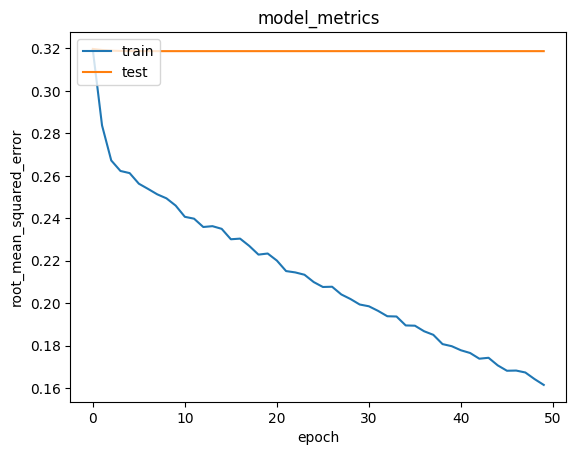

In [60]:
# visualisasi metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

RMSE (Root Mean Squared Error): Ini adalah metrik evaluasi yang digunakan untuk mengukur seberapa dekat prediksi model dengan nilai sebenarnya. Nilai RMSE yang lebih rendah menunjukkan kinerja model yang lebih baik, karena artinya kesalahan prediksi rata-rata lebih kecil. Namun sepertinya ada overfitting, karena garis test berhenti menurun.

Dari proses ini, nilai erorr akhir sebesar 0.15 dan eror pada data validasi 0.31. Nilai tersebut cukup bagus untuk sistem rekomendasi. Selanjutnya cek apakah model ini bisa membuat rekomendaasi dengan  baik.

**Mendapatkan Rekomendasi Film**

In [61]:
# memberikan rekomendasi film yang belum pernah di tonton
movie_df = film_df
df_cf = df_ratings

# mengambil sample user
user_id = df_cf.userId.sample(1).iloc[0]
movie_watched_by_user = df_cf[df_cf.userId == user_id]

movie_not_watched = movie_df[
  ~movie_df["movieId"].isin(movie_watched_by_user.movieId.values)
]["movieId"]
movie_not_watched = list(
  set(movie_not_watched).intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
  ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)


Selanjutnya, untuk memperoleh rekomendasi restoran, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [62]:
import numpy as np

# memastikan user_movie_array adalah numpy array bertipe float
user_movie_array = np.array(user_movie_array, dtype=np.float32)

ratings = model.predict(user_movie_array).flatten()

# urutkan berdasarkan skor prediksi tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

# ambil ID movie yang direkomendasikan
recommended_movies_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

# print hasil
print(f'Menampilkan rekomendasi untuk users: {user_id}')
print('=' * 27)
print('Movie dengan rating tinggi dari user')
print('----------------------------------------')

top_movie_user = (
    movie_watched_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df["movieId"].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----------------------------------------')
print('Top 10 movies recommendation')
print('----------------------------------------')

recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movies_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ':', row.genres)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Menampilkan rekomendasi untuk users: 104403
Movie dengan rating tinggi dari user
----------------------------------------
Bridges of Madison County The 1995 : ['Drama', 'Romance']
Lon The Professional aka The Professional Lon 1994 : ['Action', 'Crime', 'Drama', 'Thriller']
Lawrence of Arabia 1962 : ['Adventure', 'Drama', 'War']
----------------------------------------
Top 10 movies recommendation
----------------------------------------
Pulp Fiction 1994 : ['Comedy', 'Crime', 'Drama', 'Thriller']
Saving Private Ryan 1998 : ['Action', 'Drama', 'War']
Natural Born Killers 1994 : ['Action', 'Crime', 'Thriller']
Like Water for Chocolate Como agua para chocolate 1992 : ['Drama', 'Fantasy', 'Romance']
Once Were Warriors 1994 : ['Crime', 'Drama']
Trainspotting 1996 : ['Comedy', 'Crime', 'Drama']
Gattaca 1997 : ['Drama', 'Sci-Fi', 'Thriller']
Pushing Hands Tui shou 1992 : ['Drama']
Bean 1997 : ['Comedy']
Queen Margot Reine Margot La 1994 : ['Drama', 'Roma

Berhasil! Hasil diatas adalah rekomendasi untuk user dengan id 104403. Dari output tersebut, sistem membandingkan antara film dengan rating tinggi dari user dan top 10 film rekomendasi untuk user.

10 Rekomendasi film (dan dilihat dari genre) yang diberikan sesuai dengan, film yang sudah diberi rating tinggi oleh user tersebut.